 # Project 7: Explanatory Data Analysis & Advanced Visualization (Baby Names Dataset)

# Project Brief for Self-Coders

Here you´ll have the opportunity to code major parts of Project 7 on your own. If you need any help or inspiration, have a look at the Videos or the Jupyter Notebook with the full code. <br> <br>
Keep in mind that it´s all about __getting the right results/conclusions__. It´s not about finding the identical code. Things can be coded in many different ways. Even if you come to the same conclusions, it´s very unlikely that we have the very same code. 

## First Inspection: The most popular Names in 2018

1. __Load__ and __inspect__ the dataset "us_baby_names.csv". __Save__ the DataFrame in __df__.

2. Find the most popular __Baby Girl Names__ in __2018__. 

3. Find the most popular __Baby Boy Names__ in __2018__.

4. __Create__ the function __most_pop(year, gender, n)__ that returns the __n__ most popular __M/F__ Names in the __year XYZ__.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.options.display.float_format = '{:.2f}'.format
df = pd.read_csv('us_baby_names.csv')
df

,Year,Name,Gender,Count
0,1880,Mary,F,7065
1,1880,Anna,F,2604
2,1880,Emma,F,2003
3,1880,Elizabeth,F,1939
4,1880,Minnie,F,1746
...,...,...,...,...
1957041,2018,Zylas,M,5
1957042,2018,Zyran,M,5
1957043,2018,Zyrie,M,5
1957044,2018,Zyron,M,5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1957046 entries, 0 to 1957045
Data columns (total 4 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   Year    int64 
 1   Name    object
 2   Gender  object
 3   Count   int64 
dtypes: int64(2), object(2)
memory usage: 59.7+ MB


In [4]:
most_pop_girls = df[(df.Year == 2018) & (df.Gender == 'F')].sort_values('Count', ascending=False)
most_pop_boys = df[(df.Year == 2018) & (df.Gender == 'M')].sort_values('Count', ascending=False)

In [5]:
most_pop_boys.head(5)

,Year,Name,Gender,Count
1943042,2018,Liam,M,19837
1943043,2018,Noah,M,18267
1943044,2018,William,M,14516
1943045,2018,James,M,13525
1943046,2018,Oliver,M,13389


In [6]:
most_pop_girls.head(5)

,Year,Name,Gender,Count
1925013,2018,Emma,F,18688
1925014,2018,Olivia,F,17921
1925015,2018,Ava,F,14924
1925016,2018,Isabella,F,14464
1925017,2018,Sophia,F,13928


In [7]:
def most_pop(gender:str,
             year:int,
             n:int=5) -> pd.DataFrame:
    return df[(df.Gender == gender) & df.Year == year].sort_values('Count', ascending=False).head(n)

In [8]:
most_pop('F', 2011)

,Year,Name,Gender,Count


## Evergreen Names (1880 - 2018)

5. Find those __Evergreen Boy Names__ that are in __1880 and 2018__ among the most popular Boy Names (__Top 20__).

6. Find those __Evergreen Girl Names__ that are in __1880 and 2018__ among the most popular Girl Names (__Top 20__).

In [9]:
names_1880_girls = df[(df.Year == 1880) & (df.Gender == 'F')]
names_2018_girls = df[(df.Year == 2018) & (df.Gender == 'F')]
names_2018_girls[names_2018_girls.Name.isin(names_1880_girls.Name)].sort_values('Count', ascending=False).head(20)

,Year,Name,Gender,Count
1925013,2018,Emma,F,18688
1925014,2018,Olivia,F,17921
1925015,2018,Ava,F,14924
1925016,2018,Isabella,F,14464
1925017,2018,Sophia,F,13928
1925018,2018,Charlotte,F,12940
1925020,2018,Amelia,F,12301
1925022,2018,Evelyn,F,10376
1925023,2018,Abigail,F,9796
1925024,2018,Emily,F,8656


In [10]:
names_1880_boys = df[(df.Year == 1880) & (df.Gender == 'M')]
names_2018_boys = df[(df.Year == 2018) & (df.Gender == 'M')]
names_2018_boys[names_2018_boys.Name.isin(names_1880_boys.Name)].sort_values('Count', ascending=False).head(20)

,Year,Name,Gender,Count
1943043,2018,Noah,M,18267
1943044,2018,William,M,14516
1943045,2018,James,M,13525
1943046,2018,Oliver,M,13389
1943047,2018,Benjamin,M,13381
1943048,2018,Elijah,M,12886
1943050,2018,Mason,M,12435
1943051,2018,Logan,M,12352
1943052,2018,Alexander,M,11989
1943054,2018,Jacob,M,11770


## Advanced Data Aggregation

7. Create the following __aggregated DataFrame agg__ (you can see the first and last 5 rows):

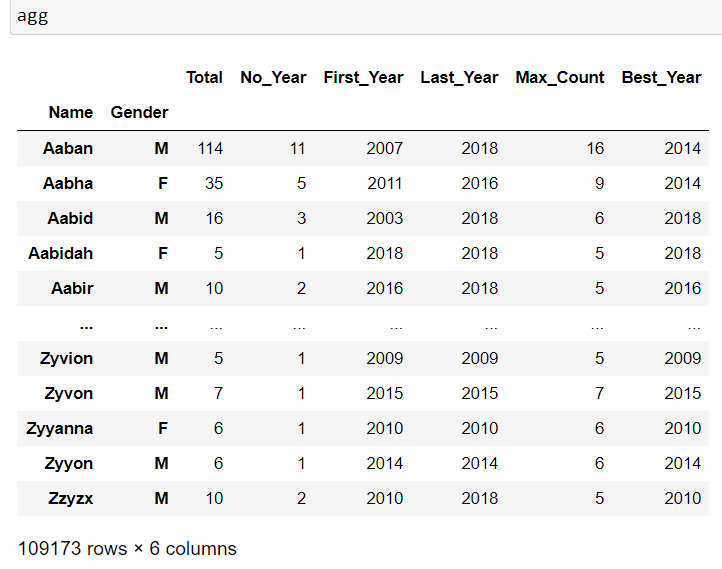

__How to interpret agg (and the first observation Aaban, M):__<br>
- There are in total 114 Male Babies with the name Aaban (Total)<br>
- The combination/entry (Aaban, M) can be found in 11 different years (No_Year)<br>
- The combination/entry (Aaban, M) appeared in the year 2007 for the first time (First_Year)<br>
- The last appearance was in the year 2018 (Last_Year)<br>
- In the most popular year, (Aaban, M) appeared 16 times (Max_Count)
- The most popular year for (Aaban, M) (Best_Year)

8. __Reset__ the Index and create a RangeIndex.

9. __Filter__ agg for the combination (Mary, F)

In [11]:
df_grouped = df.groupby([df.Name, df.Gender])

In [12]:
no_years = df[['Name', 'Gender']].value_counts()
no_years

Name      Gender
Veronica  F         139
Elsa      F         139
Norris    M         139
Liza      F         139
Norman    M         139
                   ... 
Shaunia   F           1
Dorae     F           1
Shauney   F           1
Bamlak    M           1
Noritta   F           1
Name: count, Length: 109173, dtype: int64

In [13]:
first_year = df_grouped['Year'].min()
first_year

Name     Gender
Aaban    M         2007
Aabha    F         2011
Aabid    M         2003
Aabidah  F         2018
Aabir    M         2016
                   ... 
Zyvion   M         2009
Zyvon    M         2015
Zyyanna  F         2010
Zyyon    M         2014
Zzyzx    M         2010
Name: Year, Length: 109173, dtype: int64

In [14]:
last_year = df_grouped['Year'].max()
last_year

Name     Gender
Aaban    M         2018
Aabha    F         2016
Aabid    M         2018
Aabidah  F         2018
Aabir    M         2018
                   ... 
Zyvion   M         2009
Zyvon    M         2015
Zyyanna  F         2010
Zyyon    M         2014
Zzyzx    M         2018
Name: Year, Length: 109173, dtype: int64

In [15]:
max_count = df_grouped['Count'].max()
max_count

Name     Gender
Aaban    M         16
Aabha    F          9
Aabid    M          6
Aabidah  F          5
Aabir    M          5
                   ..
Zyvion   M          5
Zyvon    M          7
Zyyanna  F          6
Zyyon    M          6
Zzyzx    M          5
Name: Count, Length: 109173, dtype: int64

In [16]:
total = df_grouped['Count'].sum()
total

Name     Gender
Aaban    M         114
Aabha    F          35
Aabid    M          16
Aabidah  F           5
Aabir    M          10
                  ... 
Zyvion   M           5
Zyvon    M           7
Zyyanna  F           6
Zyyon    M           6
Zzyzx    M          10
Name: Count, Length: 109173, dtype: int64

In [17]:
# best_year = df_grouped.apply(lambda x: x.nlargest(1, 'Count').Year)
# best_year

In [18]:
agg = pd.DataFrame({'Total':total,
                    'No_Year':no_years,
                    'First_Year':first_year,
                    'Last_Year':last_year,
                    'Max_Count':max_count}, index=total.index)
agg

,,Total,No_Year,First_Year,Last_Year,Max_Count
Name,Gender,,,,,
Aaban,M,114,11,2007,2018,16
Aabha,F,35,5,2011,2016,9
Aabid,M,16,3,2003,2018,6
Aabidah,F,5,1,2018,2018,5
Aabir,M,10,2,2016,2018,5
...,...,...,...,...,...,...
Zyvion,M,5,1,2009,2009,5
Zyvon,M,7,1,2015,2015,7
Zyyanna,F,6,1,2010,2010,6


## Most Popular Names of all Times

10. __Find__ the __10 most popular__ Male and Female Names of all Times (most popular in terms of total count). See Screenshot with final result below.

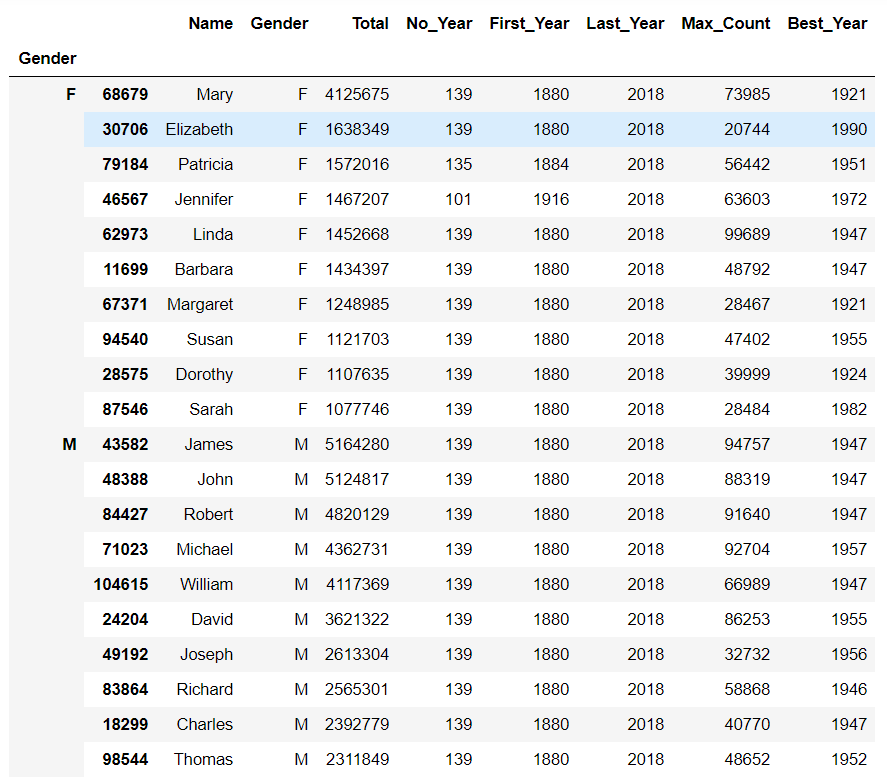

In [19]:
agg = agg.reset_index()

In [20]:
males = agg[agg.Gender == 'M'].nlargest(10, 'Total')
females = agg[agg.Gender == 'F'].nlargest(10, 'Total')
pd.concat([females, males])

,Name,Gender,Total,No_Year,First_Year,Last_Year,Max_Count
68679,Mary,F,4125675,139,1880,2018,73985
30706,Elizabeth,F,1638349,139,1880,2018,20744
79184,Patricia,F,1572016,135,1884,2018,56442
46567,Jennifer,F,1467207,101,1916,2018,63603
62973,Linda,F,1452668,139,1880,2018,99689
11699,Barbara,F,1434397,139,1880,2018,48792
67371,Margaret,F,1248985,139,1880,2018,28467
94540,Susan,F,1121703,139,1880,2018,47402
28575,Dorothy,F,1107635,139,1880,2018,39999
87546,Sarah,F,1077746,139,1880,2018,28484


## General Trends over time (1880 - 2018)

11. __Count__ the total number of __registered Babies per Year__ and visualize. __Create__ the following Plot:

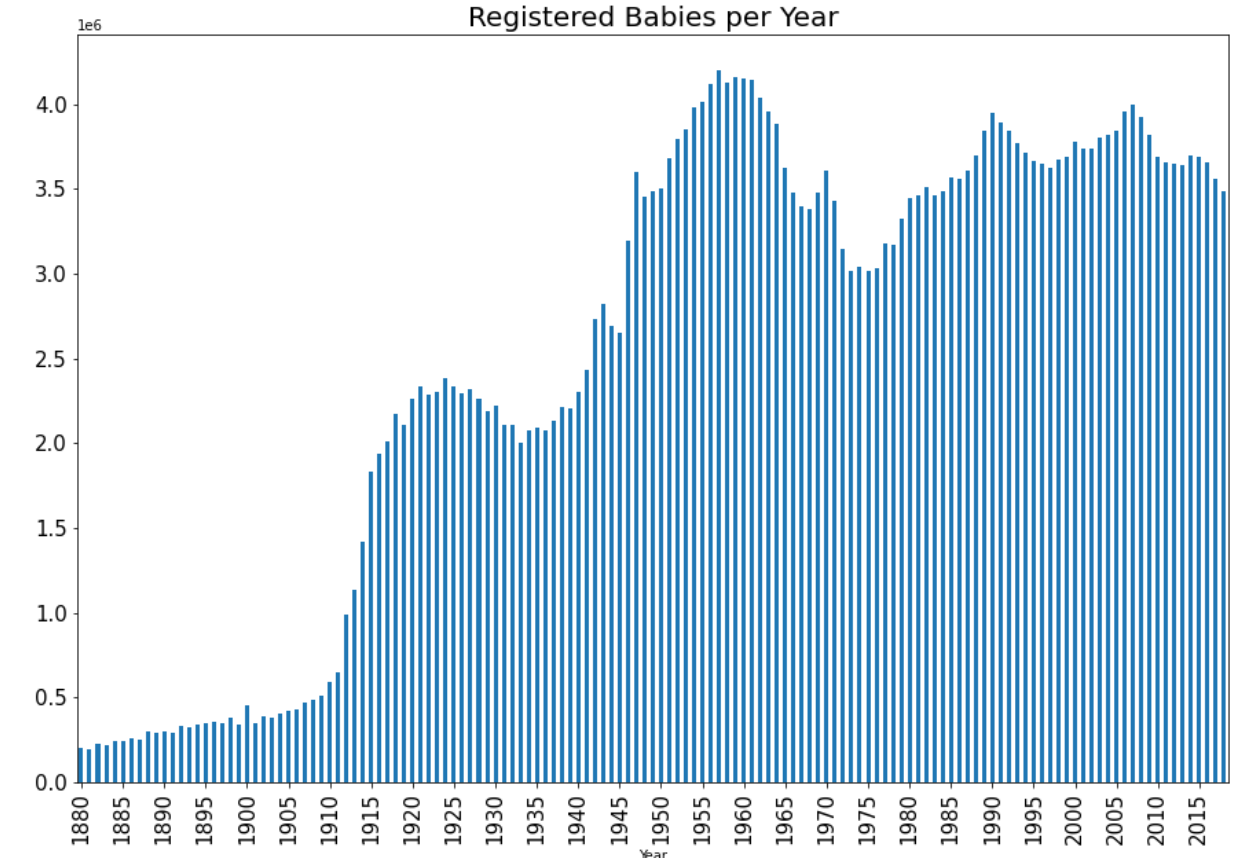

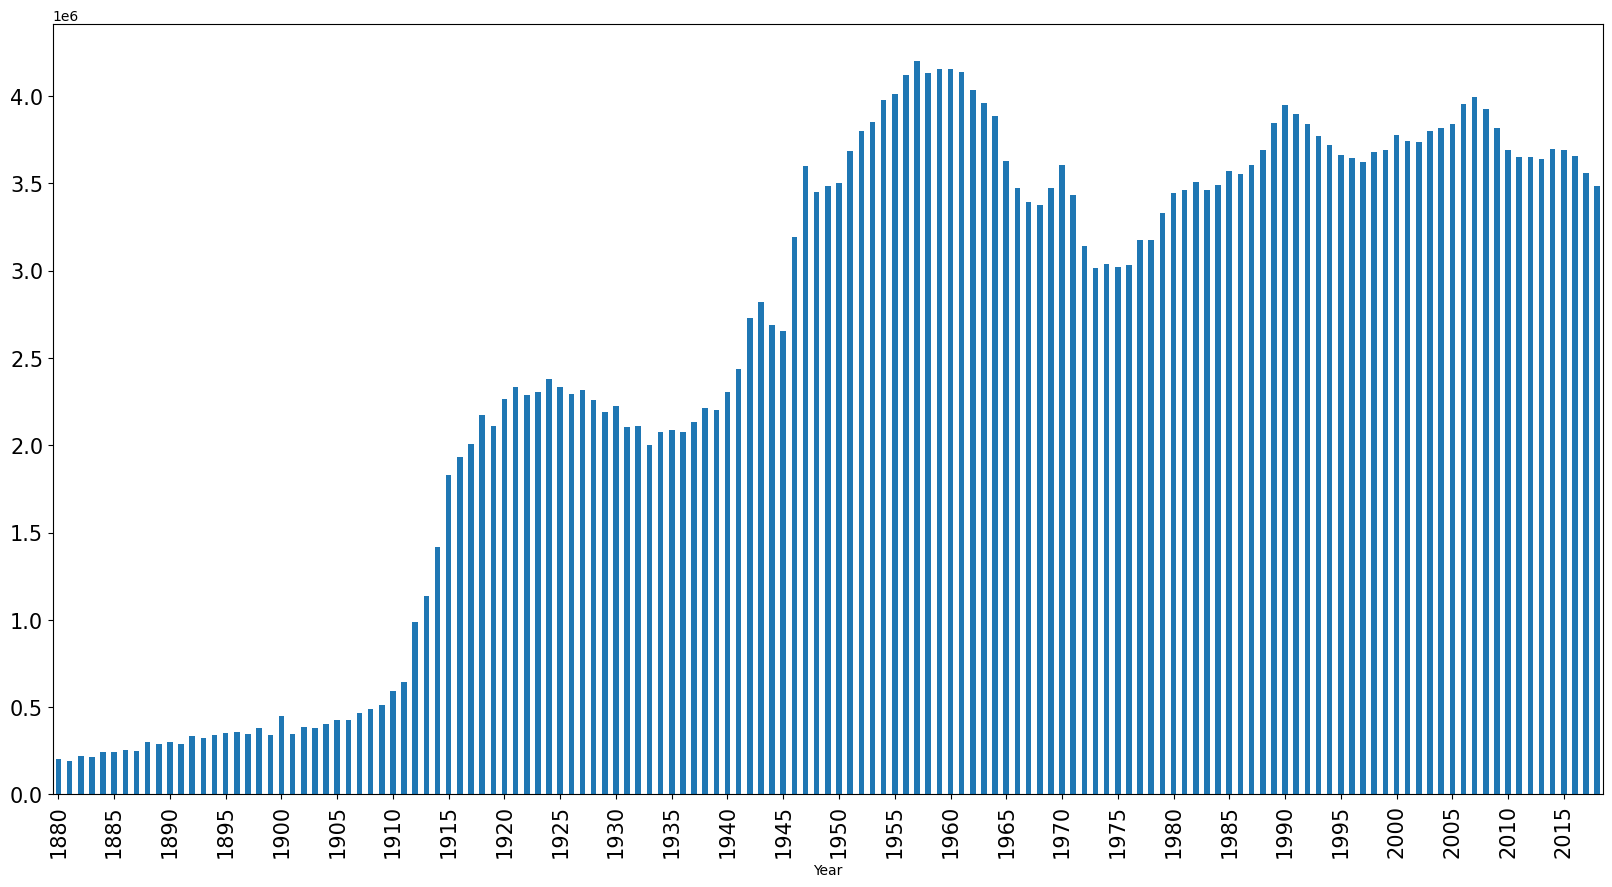

In [21]:
babies_per_year =  df.groupby(df.Year)['Count'].sum()
babies_per_year.plot(kind='bar', y='Count', figsize=(20, 10), fontsize=15)
plt.xticks(ticks=(range(0, len(babies_per_year), 5)), labels=(range(1880, 2018, 5)))
plt.show()

12. __Count__ the total number of __Unique Names per Year__ and visualize. __Create__ the following Plot:

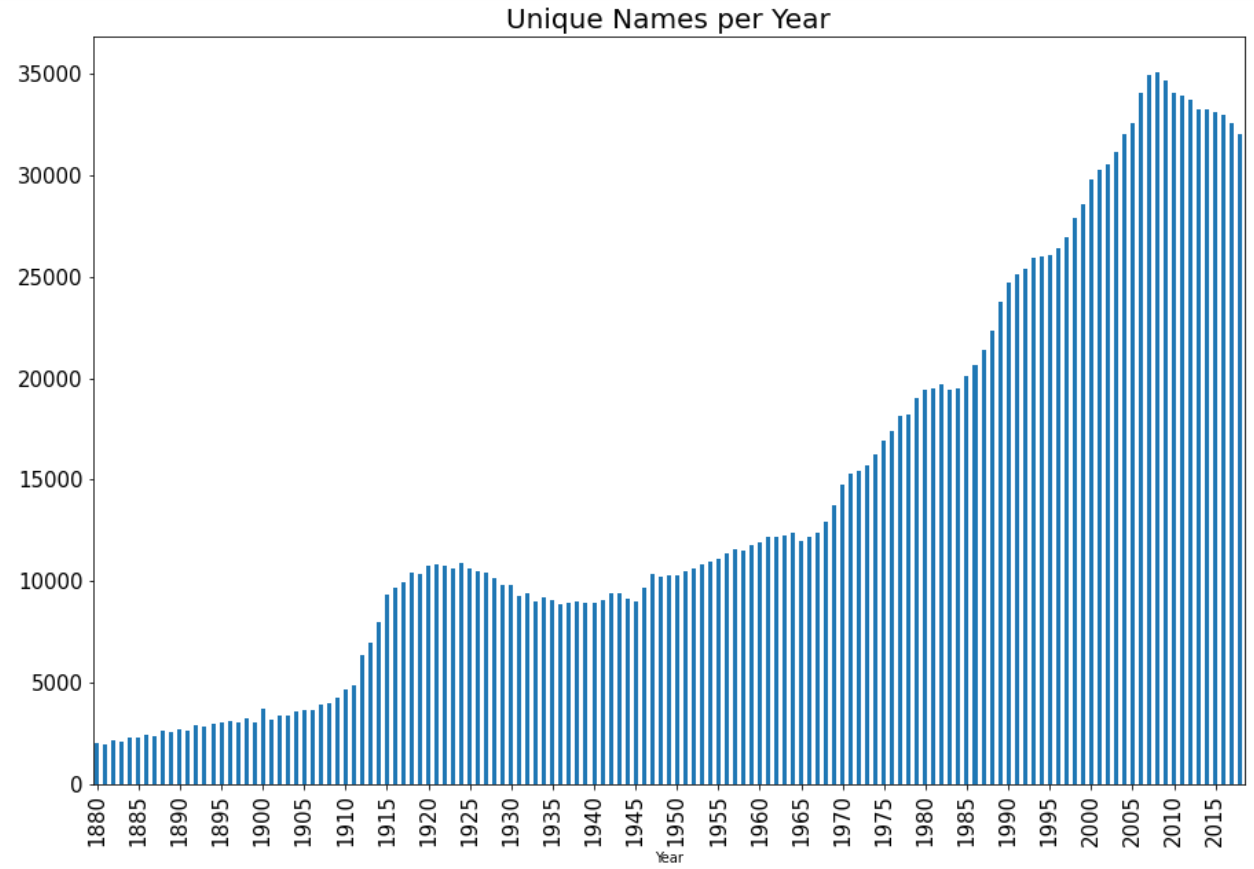

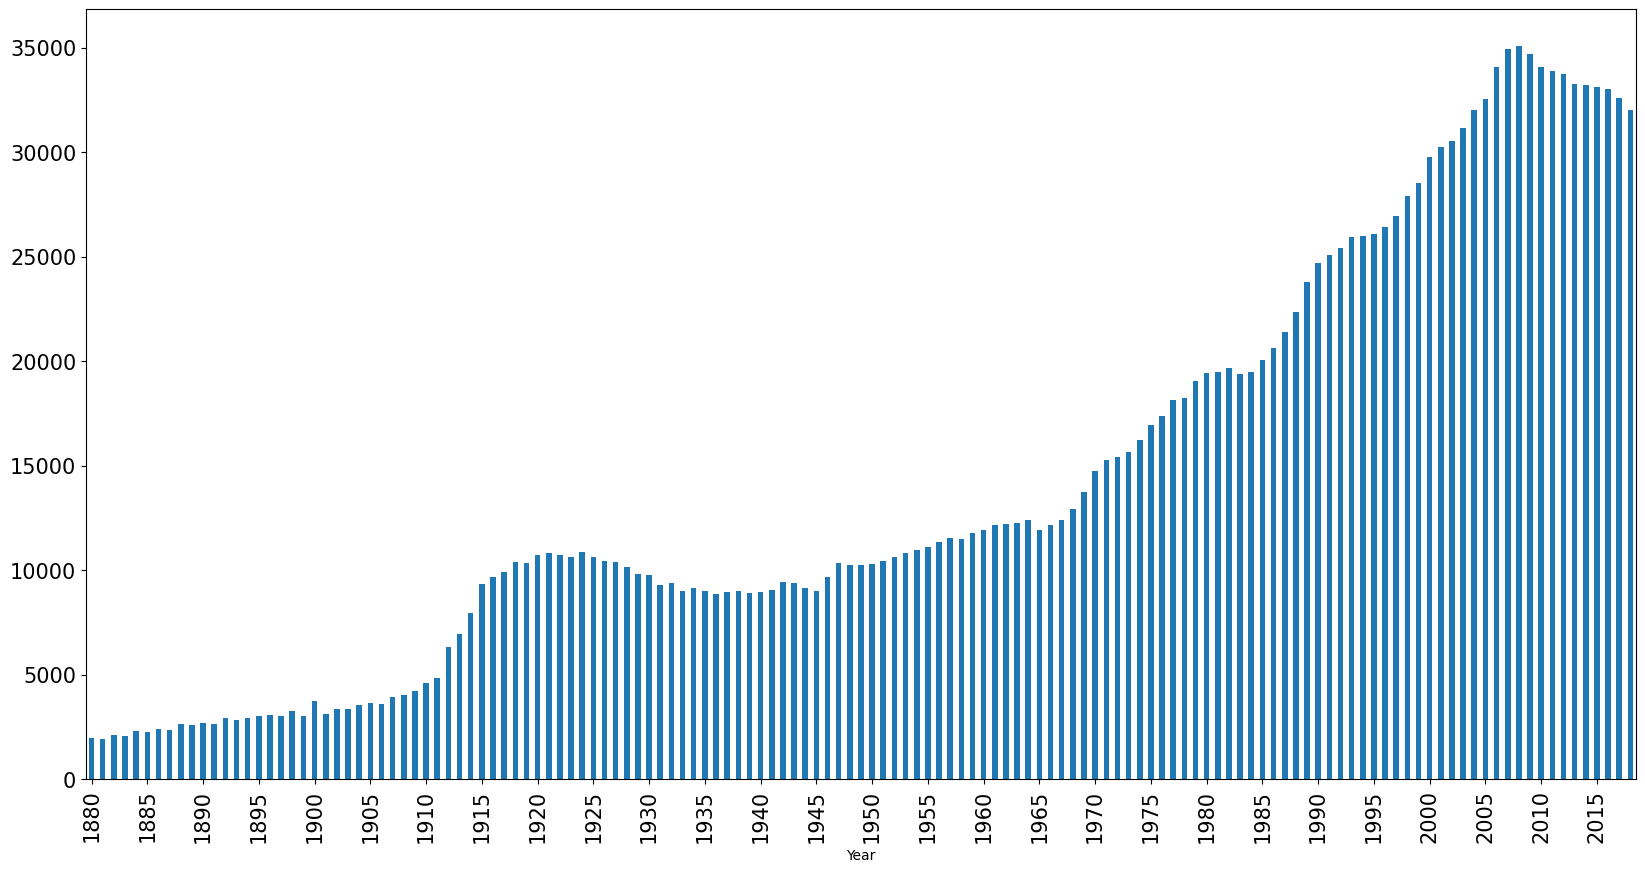

In [22]:
unique_per_year =  df.groupby(df.Year).Name.count()
unique_per_year.plot(kind='bar', figsize=(20, 10), fontsize=15)
plt.xticks(ticks=range(0, len(unique_per_year), 5), labels=range(1880, 2018, 5))
plt.show()

## Creating the Features "Popularity" and "Rank"

13. __Add__ the column __"Popularity"__ to df: <br> 

- Popularity in __babies per million__ (example: assume 2,000,000 registered Girl Names in 1950, thereof 100,000 Maries -> Popularity Score in 1950 for (Mary, F) is 100,000 / 2,000,000 * 1,000,000 = 50,000 per million.)  

14. __Add__ the column __"Rank"__ to df: <br> 

- Rank (example: assume Mary is the most popular Girl Name in 1950 -> Rank 1 for (Mary, F) in 1950.

After adding "Popularity" and "Rank", df should look as follows:

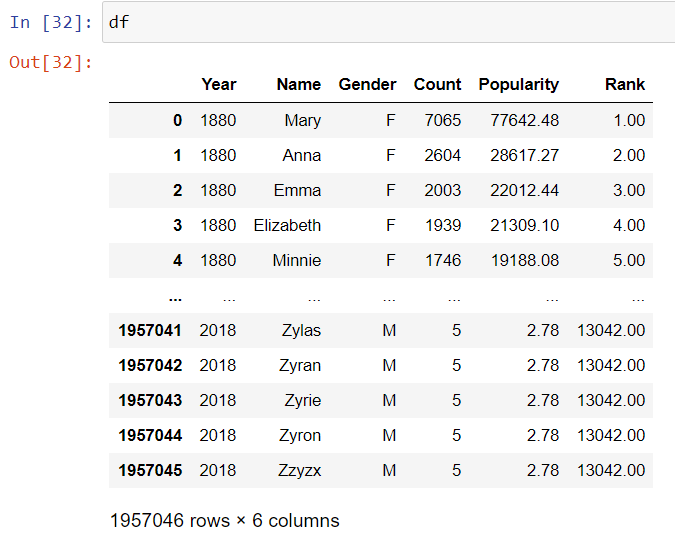

In [23]:
all_names_per_year = df.groupby([df.Year, df.Gender])['Count'].sum()
all_names_per_year

Year  Gender
1880  F           90994
      M          110490
1881  F           91953
      M          100743
1882  F          107847
                 ...   
2016  M         1891585
2017  F         1719138
      M         1842837
2018  F         1686961
      M         1800392
Name: Count, Length: 278, dtype: int64

In [24]:
def get_popularity(row):
    return (row.Count / all_names_per_year.loc[row.Year, row.Gender]) * 1000000

In [25]:
popularity = df[['Count', 'Year', 'Gender']].apply(get_popularity, axis=1)

In [26]:
df['popularity'] = popularity

In [27]:
df['Rank'] = df.groupby([df.Year, df.Gender]).Count.apply(lambda x: x.rank(ascending=False)).values

In [28]:
df

,Year,Name,Gender,Count,popularity,Rank
0,1880,Mary,F,7065,77642.48,1.00
1,1880,Anna,F,2604,28617.27,2.00
2,1880,Emma,F,2003,22012.44,3.00
3,1880,Elizabeth,F,1939,21309.10,4.00
4,1880,Minnie,F,1746,19188.08,5.00
...,...,...,...,...,...,...
1957041,2018,Zylas,M,5,2.78,13042.00
1957042,2018,Zyran,M,5,2.78,13042.00
1957043,2018,Zyrie,M,5,2.78,13042.00
1957044,2018,Zyron,M,5,2.78,13042.00


## Visualizing Name Trends over Time

15. __Visualize__ Popularity and Rank over time (see example below).

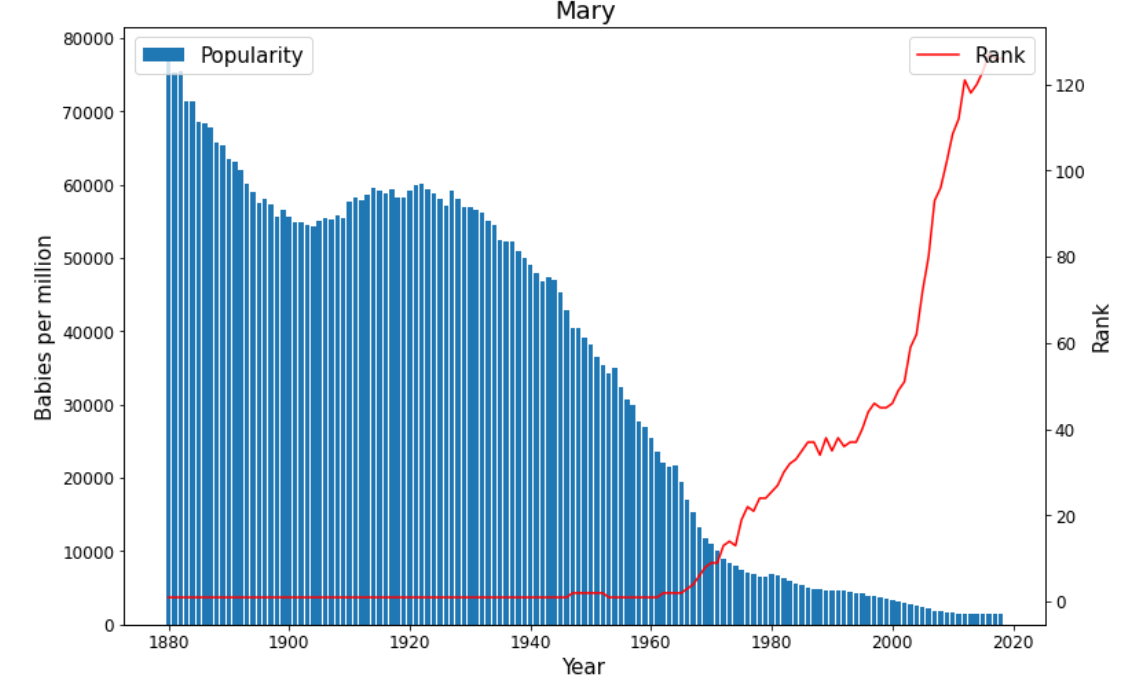

16. __Create__ this plot for all __Evergreen Names__ (see Questions 5. and 6.) (a reusable user-defined function might help)

In [29]:
mary = df[(df.Name == "Mary") & (df.Gender == "F")]
mary.tail(60)

,Year,Name,Gender,Count,popularity,Rank
560704,1959,Mary,F,54474,26926.87,1.00
572471,1960,Mary,F,51475,25457.34,1.00
584392,1961,Mary,F,47680,23631.60,1.00
596575,1962,Mary,F,43486,22112.80,2.00
608784,1963,Mary,F,41550,21558.59,2.00
621066,1964,Mary,F,40990,21633.19,2.00
633463,1965,Mary,F,34270,19415.96,2.00
645416,1966,Mary,F,28884,17071.76,3.00
657568,1967,Mary,F,25313,15333.10,4.00
669967,1968,Mary,F,21725,13245.27,6.00


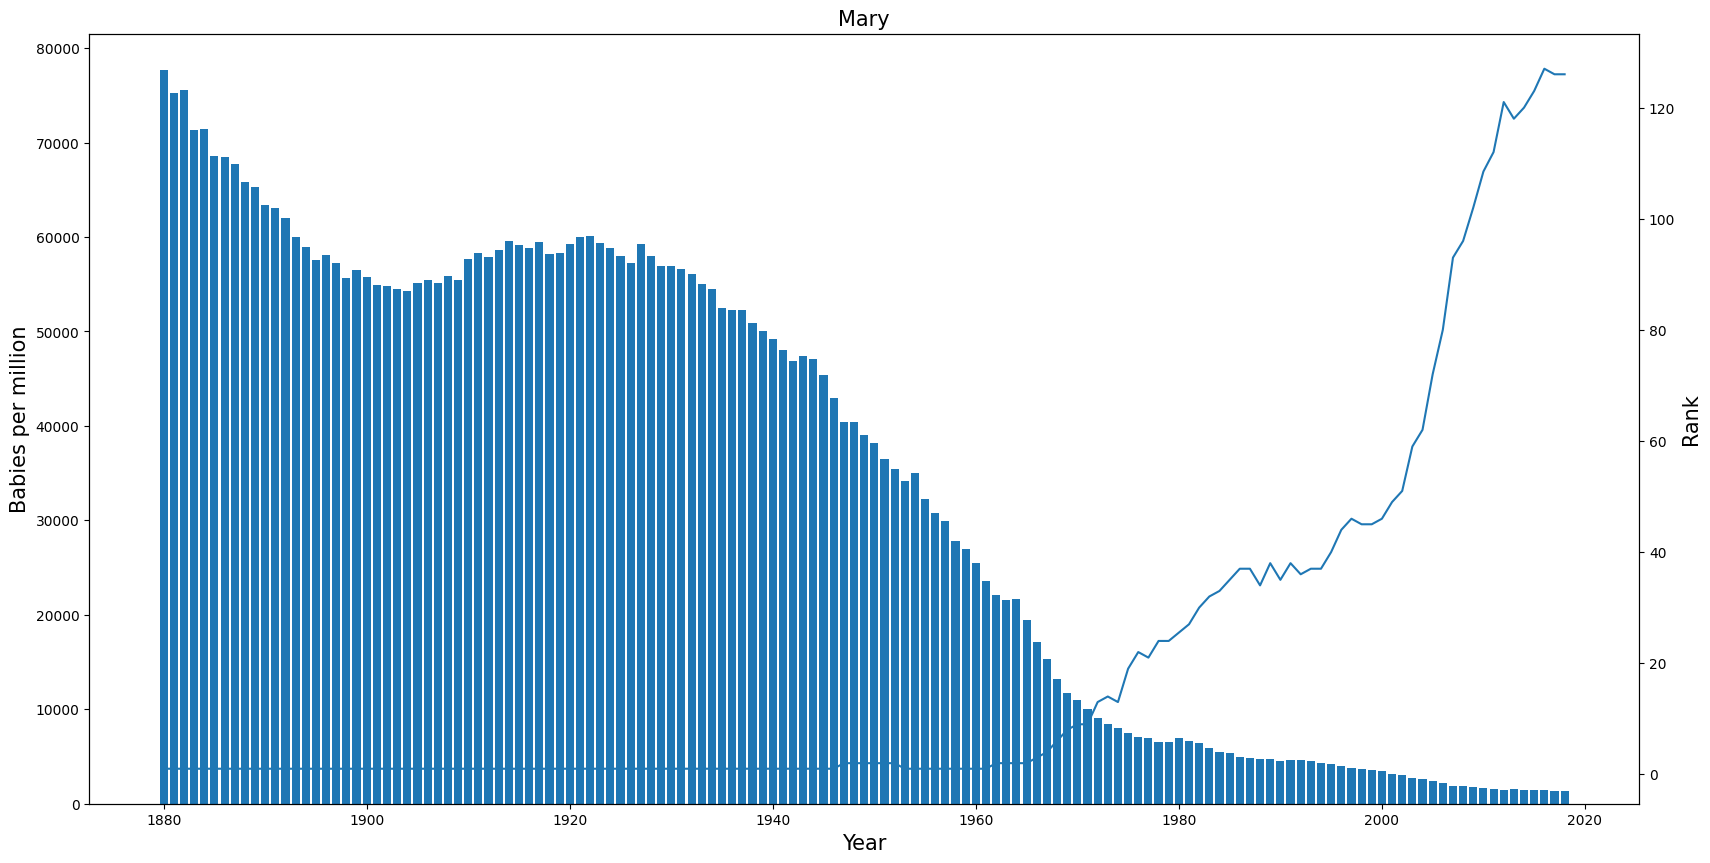

In [33]:
fig, ax1 = plt.subplots(figsize = (20, 10))
ax1.bar(x = mary.Year, height= mary.popularity, label = "Popularity")
ax2 = ax1.twinx()
ax2.plot(mary.Year, mary.Rank, label = "Rank")
ax1.set_xlabel("Year", fontsize = 15)
ax1.set_ylabel("Babies per million", fontsize = 15)
ax2.set_ylabel("Rank", fontsize = 15)
ax1.set_title("Mary", fontsize = 15)
plt.show()

# Why does a Name´s Popularity suddenly change? (Part 1)

17. __Add__ the additional columns __"Pop_lag1"__ (Popularity one year ago) and __"Pop_diff"__ (change in popularity from previous year to this year) to df.  

18. __Create__ df2 starting with the __year 1900__ (from 1900 till today).

19. __Filter__ df2 and find the __20 largest values__ in "Pop_diff" (get complete rows).

20. __Create__ the popularity/rank plot (see 15. and 16.) for the Names filtered in 19.

21. __Search__ the Web for the Names __"Linda"__, __"Shirley"__ and __"Jason"__ and __find out__ why the popularity suddenly changed/spiked.

## Why does a Name´s Popularity suddenly change? (Part 2)

_No additional assignments on this. Watch the video for some more examples._

## Persistant vs. Spike-Fade Names

_No additional assignments on this. Watch the video for some more advanced examples._

## Most Popular Unisex Names

22. __Find__ the most popular __Unisex Names__ of all times. (Unisex names are names given to Boys and Girls).  

# +++++++++ See some Hints below +++++++++++++

# ++++++++++++++++ Hints++++++++++++++++++++

__Hints for 5. and 6.__<br>
Use most_pop().

__Hints for 7.__


In [30]:
agg = df.groupby(...).agg(Total = (...), No_Year = (...), First_Year = (...), Last_Year = (...), Max_Count = (...))

TypeError: 'ellipsis' object is not callable

Add Best_Year separately with a udf (tricky...)

__Hints for 10.__<br>
Aggregate agg further.

__Hints for 12.__<br>
Treat Instances of Unisex Names (eg. (Marie, F) and (Marie, M)) as different Names.

__Hints for 13.__<br>
Use groupby() and transform()

__Hints for 14.__<br>
Use groupby() and apply(lambda x: x.rank(ascending = False))

__Hints for 17.__<br>
shift() might help.

__Hints for 18.__<br>
difference between "Popularity" and "Pop_lag1".

__Hints for 19.__<br>
use nlargest()